## Observations and Insights 

1.  Based on the Summary Statistics, Ramicane was the most effective drug regimen for decreasing overall tumor volume. 
    Capomulin was similarly effective. Ketapril was least effective, performing worse than a placebo. Also less effective
    were Stelasyn, Naftisol and Zoniferal.
2.  

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
# TODO: Do I need random?
import random
import numpy as np


# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_mouse_study_df = pd.merge(mouse_metadata, study_results, on='Mouse ID')
# Display the data table for preview
combined_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
count_mice = combined_mouse_study_df['Mouse ID'].count()
count_mice

1893

In [14]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
# TODO!

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 



In [3]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mice_study_cleaned_df = combined_mouse_study_df.drop_duplicates()

In [4]:
# Checking the number of mice in the clean DataFrame.
count_mice_cleaned = mice_study_cleaned_df['Mouse ID'].count()
count_mice_cleaned

1892

## Summary Statistics

In [5]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol_by_drug = mice_study_cleaned_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").mean()
#mean_tumor_vol_by_drug
median_tvbd = mice_study_cleaned_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").median()
#median_tvbd
variance_tvbd = mice_study_cleaned_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").var()
#variance_tvbd
std_dev_tvbd = mice_study_cleaned_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").std()
#std_dev_tvbd
SEM_tvbd = mice_study_cleaned_df[["Drug Regimen", "Tumor Volume (mm3)"]].groupby("Drug Regimen").sem()
#SEM_tvbd

# Assemble the resulting series into a single summary dataframe.
combined_stats_tvbd = pd.merge(mean_tumor_vol_by_drug, median_tvbd, on='Drug Regimen')
combined_stats_tvbd = combined_stats_tvbd.rename(columns={"Tumor Volume (mm3)_x":"Mean Tumor Volume (mm3)", "Tumor Volume (mm3)_y":"Median Tumor Volume (mm3)"})
combined_stats_tvbd = pd.merge(combined_stats_tvbd, variance_tvbd, on='Drug Regimen')
combined_stats_tvbd = pd.merge(combined_stats_tvbd, std_dev_tvbd, on='Drug Regimen')
combined_stats_tvbd = combined_stats_tvbd.rename(columns={"Tumor Volume (mm3)_x":"Tumor Volume Variance (mm3)", "Tumor Volume (mm3)_y":"Tumor Volume Standard Deviation"})
combined_stats_tvbd = pd.merge(combined_stats_tvbd, SEM_tvbd, on='Drug Regimen')
combined_stats_tvbd = combined_stats_tvbd.rename(columns={"Tumor Volume (mm3)":"Tumor Volume Standard Error of the Mean"})

combined_stats_tvbd



,Mean Tumor Volume (mm3),Median Tumor Volume (mm3),Tumor Volume Variance (mm3),Tumor Volume Standard Deviation,Tumor Volume Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.368318,50.909965,42.278090,6.502160,0.514041
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
# TODO!

## Bar and Pie Charts

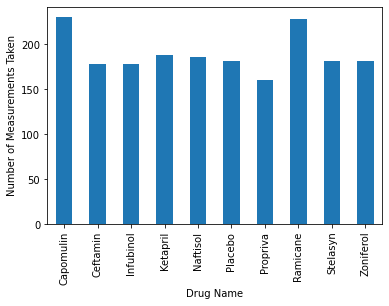

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pandas.

drug_groups = mice_study_cleaned_df.groupby('Drug Regimen')
count_measures = drug_groups['Drug Regimen'].count()
count_chart = count_measures.plot(kind='bar')
count_chart.set_xlabel("Drug Name")
count_chart.set_ylabel("Number of Measurements Taken")
plt.show()
plt.tight_layout()

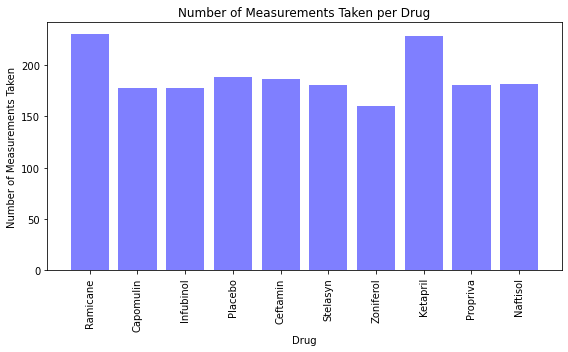

In [8]:
# Generate a bar plot showing the total number of measurements taken on each drug regimen using pyplot.
drug_list = mice_study_cleaned_df["Drug Regimen"].unique()
x_axis = np.arange(len(drug_list))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, drug_groups.count()["Timepoint"], color='b', alpha=0.5, align="center")
plt.xticks(tick_locations, drug_list, rotation="vertical")
plt.title("Number of Measurements Taken per Drug")
plt.xlabel("Drug")
plt.ylabel("Number of Measurements Taken")
plt.tight_layout()
plt.savefig("../Images/amt_measures_per_drug.png")
plt.show()

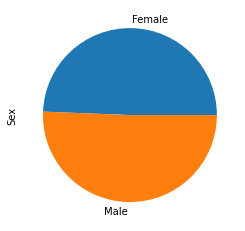

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_groups = mice_study_cleaned_df.groupby('Sex')
count_genders = gender_groups['Sex'].count()
gender_chart = count_genders.plot(kind='pie')
plt.show()
plt.tight_layout()

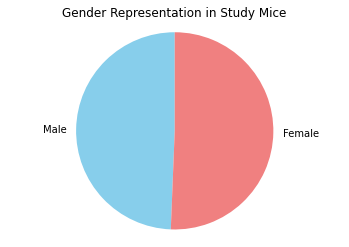

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_groups = mice_study_cleaned_df.groupby('Sex')
count_genders = gender_groups['Sex'].count()
gender_list = mice_study_cleaned_df["Sex"].unique()
colors = ["skyblue", "lightcoral"]
plt.title("Gender Representation in Study Mice")
plt.pie(count_genders, labels=gender_list, colors=colors,
        startangle=90)
plt.axis("equal")
plt.show()

#TODO: change order of labels or count numbers?


## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
